
 Curso : Ciência de Dados




Grupo: Camila Perazzo, Daniel Scalioni, Sara Coutinho. 

Atividade de Aplicação de PCA - 21/05/2023. 

Diário de Bordo da atividade:


* 13/05/23:00:00 às 00:30 horas - Entendimento do Exercício e preparo do notebook. Plot do PCA 3D.
* 16/05/23:03:00 às 03:30 horas - Análise das variáveis.
* 17/05/23:01:00 às 04:30 horas - Normalização Z agrupado por Subespécie, Boxplot agrupado por subespécie, gráfico pca com 3 componentes indicando subespécie.
* 19/05/23:16:00 às 22:00 - Acréscimo da Normalização MinMax para algumas variáveis, adição de análises no notebook, ajustes na descrição da metodologia, seleção das variáveis pela correlação.
* 20/05/23:04:00 às 06:00 - Acréscimo da remoção de outliers por interquartil e rebalanceamento da classe target para a correlação entre os atributos não fiquem viesados





O projeto foi desenvolvido tendo como proposta a atividade Aplicação de PCA do curso de Ciência de Dados da capacitação tecnológica - PUC Campinas.


Como a proposta focou na aplicação da Técnica PCA, escolhemos adotar como framework para guiá-lo a **metodologia Semma**. Esta metodologia tem por premissa as seguintes etapas: definição da amostra (**S**), exploração dos dados (**E**), modificação dos dados (**M**), modelagem (**M**) e verificação dos resultados (**A**).


Com base nisso e nos critérios de avaliação da atividade, adaptamos os passos da metodologia para os seguintes no nosso projeto:


*   Coleta dos dados e entendimento deles
*   Exploração dos dados
*   Preparação dos Dados
*   Aplicar PCA para visualização e seleção de atributos
*   Verificação dos resultados e discussão do desempenho obtido por cada abordagem


Tendo em vista esses passos, o presente notebook encontra-se dividido nas seguintes seções:


🎲 1) Coleta, exploração e Preparação dos dados


🔢 2) PCA - Visualização


🔢 3) PCA - Seleção de Atributos


🔎 4) Análises das diferenças das abordagens




# 🎲 Coleta, exploração e Preparação 

In [2]:
#---Preparando o Ambiente

#imports
import pandas as pd #dataframe 
import matplotlib.pyplot as plt #plots 
import seaborn as sb #plots  

#---Coleta dos dados 

#Importando o arquivo de dados 
df = pd.read_csv('/content/Iris-2.csv')

#Verificando o formato do conjunto de dados 
print("Shape do conjunto de dados: ",df.shape)

#Visualizando amostra do conjunto de dados
print("Amostra do conjunto de dados: /n")
df.sample(5)

Shape do conjunto de dados:  (150, 5)
Amostra do conjunto de dados: /n


,Comprimento Sépala (cm),Largura Sépala (cm),Comprimento Pétala (cm),Largura Pétala (cm),Subespécie
115,6.4,3.2,5.3,2.3,2
89,5.5,2.5,4.0,1.3,1
121,5.6,2.8,4.9,2.0,2
58,6.6,2.9,4.6,1.3,1
63,6.1,2.9,4.7,1.4,1


In [3]:
print("Variaçoes possiveis para subespécie: ",df['Subespécie'].unique())

Variaçoes possiveis para subespécie:  [0 1 2]


In [4]:
df.columns

Index(['Comprimento Sépala (cm)', 'Largura Sépala (cm)',
       'Comprimento Pétala (cm)', 'Largura Pétala (cm)', 'Subespécie'],
      dtype='object')

In [5]:
#---Exploraçao dos dados 

#Analisando os tipos de dados do conjunto de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Comprimento Sépala (cm)  150 non-null    float64
 1   Largura Sépala (cm)      150 non-null    float64
 2   Comprimento Pétala (cm)  150 non-null    float64
 3   Largura Pétala (cm)      150 non-null    float64
 4   Subespécie               150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
df['Subespécie'].value_counts()

0    50
1    50
2    50
Name: Subespécie, dtype: int64

O conjunto de dados diz respeito a características de 3 subespécies de flores. Ele possui 5 categorias, das quais 4 são correspondentes a variáveis preditoras e são dadas em float e 1 é a variável predita, dada em int e assume os valores 0,1 e 2.


As variáveis preditoras são:*Comprimento Sépala (cm)*, *Largura Sépala (cm)*, *Comprimento Pétala (cm)*, *Largura Pétala (cm)* e a predita é  *Subespécie*. Ao todo, o conjunto possui originalmente 150 registros considerados em um único arquivo.

In [7]:
#presença de dados nulos 
print("Dados nulos: \n")
print(df.isnull().sum())

#presença de dados duplicados
print("\n Dados duplicados: ")
print(df.duplicated().sum())

Dados nulos: 

Comprimento Sépala (cm)    0
Largura Sépala (cm)        0
Comprimento Pétala (cm)    0
Largura Pétala (cm)        0
Subespécie                 0
dtype: int64

 Dados duplicados: 
1


In [8]:
#visualizando instância duplicada 
df[df.duplicated()]

,Comprimento Sépala (cm),Largura Sépala (cm),Comprimento Pétala (cm),Largura Pétala (cm),Subespécie
142,5.8,2.7,5.1,1.9,2


No conjunto não foram detectados valores nulos. Foi encontrada uma instância duplicada, a de index 142, correspondente a um registro da subespécie tipo 2.
Optou-se removê-la para não gerar ruído no processo.


In [9]:
#limpeza dos dados: removendo variaveis duplicadas
df = df.drop_duplicates(keep=False) 
df = df.reset_index(drop=True)

In [10]:
#visualizaçao de estatisticas dos dados do conjunto
df.describe()

,Comprimento Sépala (cm),Largura Sépala (cm),Comprimento Pétala (cm),Largura Pétala (cm),Subespécie
count,148.000000,148.000000,148.000000,148.000000,148.000000
mean,5.843919,3.062162,3.739865,1.189865,0.986486
std,0.833665,0.436811,1.770266,0.762982,0.816384
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.575000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.325000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Das instâncias que restaram no conjunto, por essas estatísticas observa-se que os valores máximos e mínimos não são muito diferentes. Como o PCA é uma técnica que considera a geometria dos dados, investigamos as distribuições de cada um. Em seguida adotaremos técnicas de normalização. Por fim, verificamos a existência de outliers nos dados.






array([[<Axes: title={'center': 'Comprimento Sépala (cm)'}>,
        <Axes: title={'center': 'Largura Sépala (cm)'}>],
       [<Axes: title={'center': 'Comprimento Pétala (cm)'}>,
        <Axes: title={'center': 'Largura Pétala (cm)'}>],
       [<Axes: title={'center': 'Subespécie'}>, <Axes: >]], dtype=object)

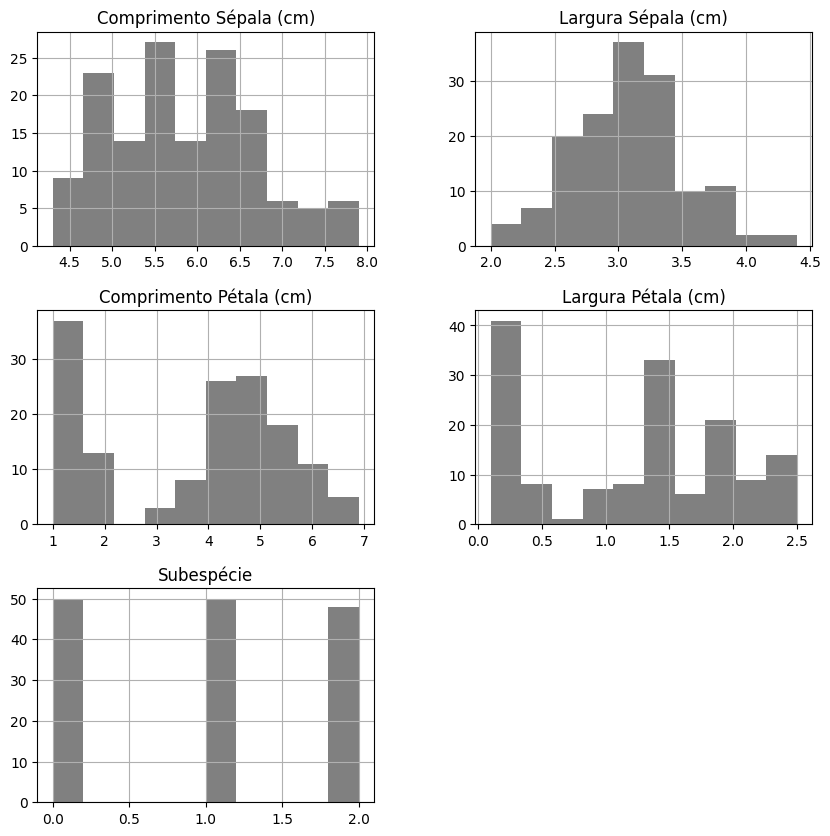

In [11]:
df.hist(color='gray', figsize=[10,10])

Os dados da variável predita estão praticamente balanceados para as 3 categorias.


Quanto às variáveis preditas, o Comprimento Sépala, Largura Sépala se assemelham às distribuições normais. Para essas variáveis e Subespécie adotaremos a distribuição minmax.


As variáveis Comprimento Pétala e Largura Pétala possuem valores altos a esquerda que parecem assimétricas; Para elas adotaremos a padronização.


In [12]:
#---Preparaçao dos dados 

import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler

#criando novo dataframe para receber mudanças
data = df.copy() 

#Normalizaçao MinMax
scaler = MinMaxScaler()
MinMaxScaler().fit(data[['Comprimento Sépala (cm)']].to_numpy())
data['Comprimento Sépala (cm)'] = MinMaxScaler().fit_transform(data[['Comprimento Sépala (cm)']].to_numpy())
MinMaxScaler().fit(data[['Largura Sépala (cm)']].to_numpy())
data['Largura Sépala (cm)'] = MinMaxScaler().fit_transform(data[['Largura Sépala (cm)']].to_numpy())
MinMaxScaler().fit(data[['Subespécie']].to_numpy())
data['Subespécie'] = MinMaxScaler().fit_transform(data[['Subespécie']].to_numpy())

#Normalizaçao Padronizaçao
scaler = StandardScaler()
StandardScaler().fit(data[['Comprimento Pétala (cm)']].to_numpy())
data['Comprimento Pétala (cm)']=scaler.fit_transform(data[['Comprimento Pétala (cm)']].to_numpy())
StandardScaler().fit(data[['Largura Pétala (cm)']].to_numpy())
data['Largura Pétala (cm)']=scaler.fit_transform(data[['Largura Pétala (cm)']].to_numpy())

#visualizaçao dos valores alterados
data.head(5)

,Comprimento Sépala (cm),Largura Sépala (cm),Comprimento Pétala (cm),Largura Pétala (cm),Subespécie
0,0.222222,0.625000,-1.326247,-1.301769,0.0
1,0.166667,0.416667,-1.326247,-1.301769,0.0
2,0.111111,0.500000,-1.382927,-1.301769,0.0
3,0.083333,0.458333,-1.269566,-1.301769,0.0
4,0.194444,0.666667,-1.326247,-1.301769,0.0


In [13]:
#visualizaçao das Subsespécies alteradas
data['Subespécie'].unique()

array([0. , 0.5, 1. ])

Agora, as novas subespécies são:
* A 0 é representada por 0
* A 1 por 0.5
* A 2 por 1.


Visualizarmos a seguir os histogramas das variáveis que aplicamos a padronização a fim de verificar como se dá a distribuição delas normalizadas.

array([[<Axes: title={'center': 'Comprimento Sépala (cm)'}>,
        <Axes: title={'center': 'Largura Sépala (cm)'}>],
       [<Axes: title={'center': 'Comprimento Pétala (cm)'}>,
        <Axes: title={'center': 'Largura Pétala (cm)'}>],
       [<Axes: title={'center': 'Subespécie'}>, <Axes: >]], dtype=object)

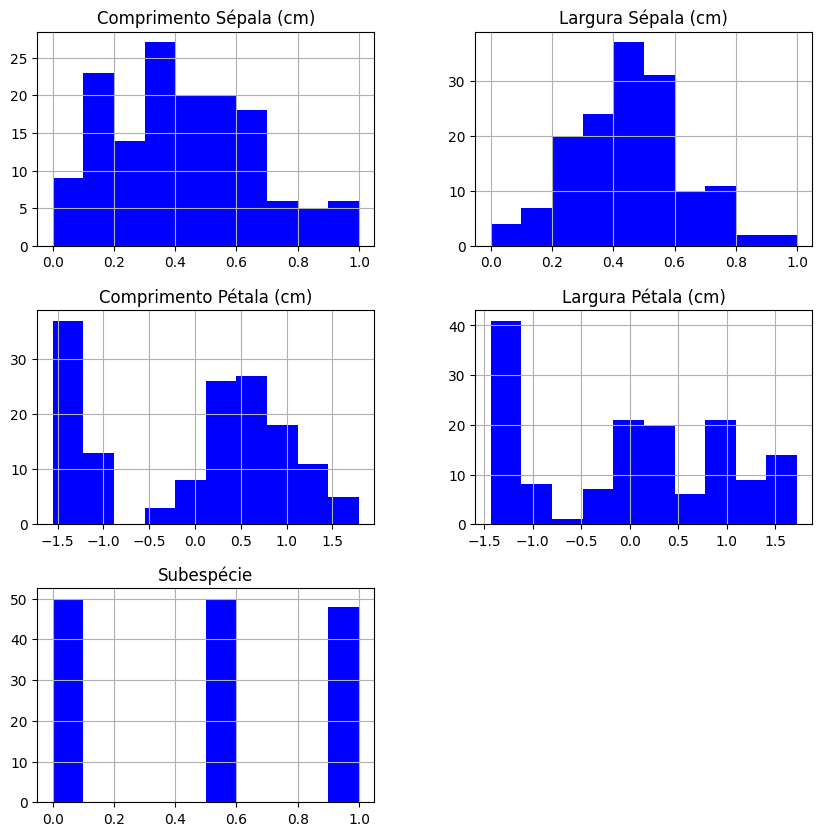

In [14]:
data.hist(color='b', figsize=[10,10])

As distribuições alteram um pouco mas ainda estão parecidas as primeiras. Visualizamos como se dá a distribuição dos dados pelos gráficos boxplot.

Text(0.5, 1.0, 'Boxplot das variaveis do Iris')

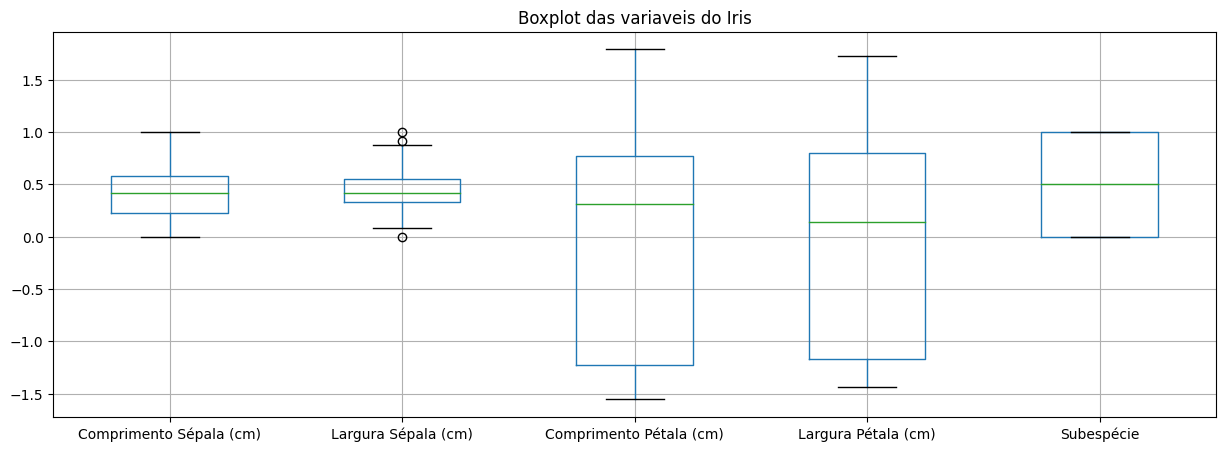

In [15]:
# Boxplot para encontrar outliers
# Remocao da coluna de subespecie
data.boxplot(figsize=[15,5])
plt.title('Boxplot das variaveis do Iris')

Text(0, 0.5, 'cm')

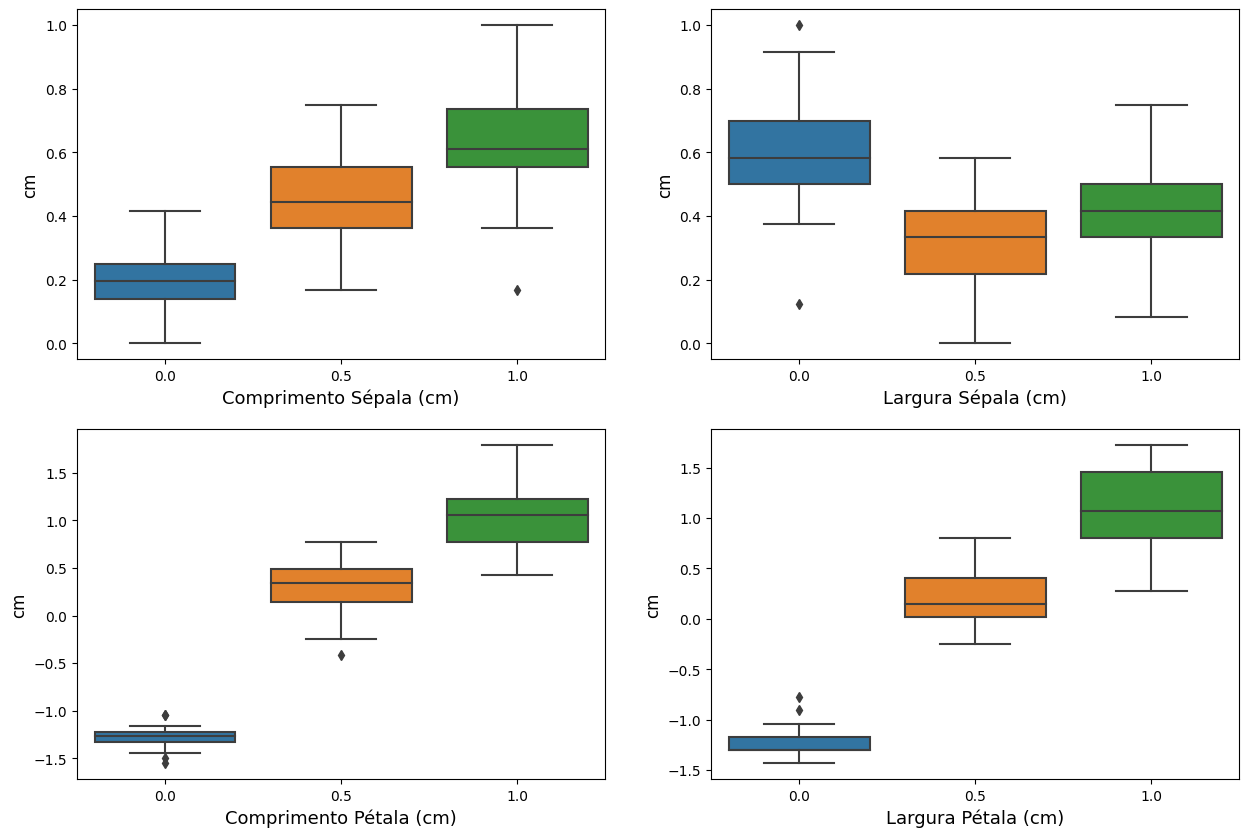

In [16]:
# Boxplot agrupando por subespecie pois entendemos que as especies
# possuem diferentes faixas de atributos

fig, ax = plt.subplots(2, 2, figsize=(15,10))
colunas = ['Comprimento Sépala (cm)', 'Largura Sépala (cm)', 'Comprimento Pétala (cm)', 'Largura Pétala (cm)']

#sb.boxplot(data=df, y='Comprimento Sépala (cm)', x='Subespécie', ax=ax[0,0])
sb.boxplot(data=data, y='Comprimento Sépala (cm)', x='Subespécie', ax=ax[0,0])
ax[0][0].set_xlabel(colunas[0], fontsize=13)
ax[0][0].set_ylabel('cm', fontsize=12)

sb.boxplot(data=data, y='Largura Sépala (cm)', x='Subespécie',ax=ax[0,1])
ax[0][1].set_xlabel(colunas[1], fontsize=13)
ax[0][1].set_ylabel('cm', fontsize=12)

sb.boxplot(data=data, y='Comprimento Pétala (cm)', x='Subespécie',ax=ax[1,0])
ax[1][0].set_xlabel(colunas[2], fontsize=13)
ax[1][0].set_ylabel('cm', fontsize=12)

sb.boxplot(data=data, y='Largura Pétala (cm)', x='Subespécie',ax=ax[1,1])
ax[1][1].set_xlabel(colunas[3], fontsize=13)
ax[1][1].set_ylabel('cm', fontsize=12)

Por esses gráficos, percebe-se que a classe 0 é a que mais apresenta valores discrepantes, relativos ao comprimento e largura da Pétala e Largura da Sépala. A classe 0.5 (originalmente a 1) apresenta comprimento de pétala menor em um dos outliers e a 1 (originalmente a 2) apresenta comprimento da sépala menor em um dos seus outliers também.


Após isso, visualizamos as distribuições por classe para cada variável no gráfico abaixo.

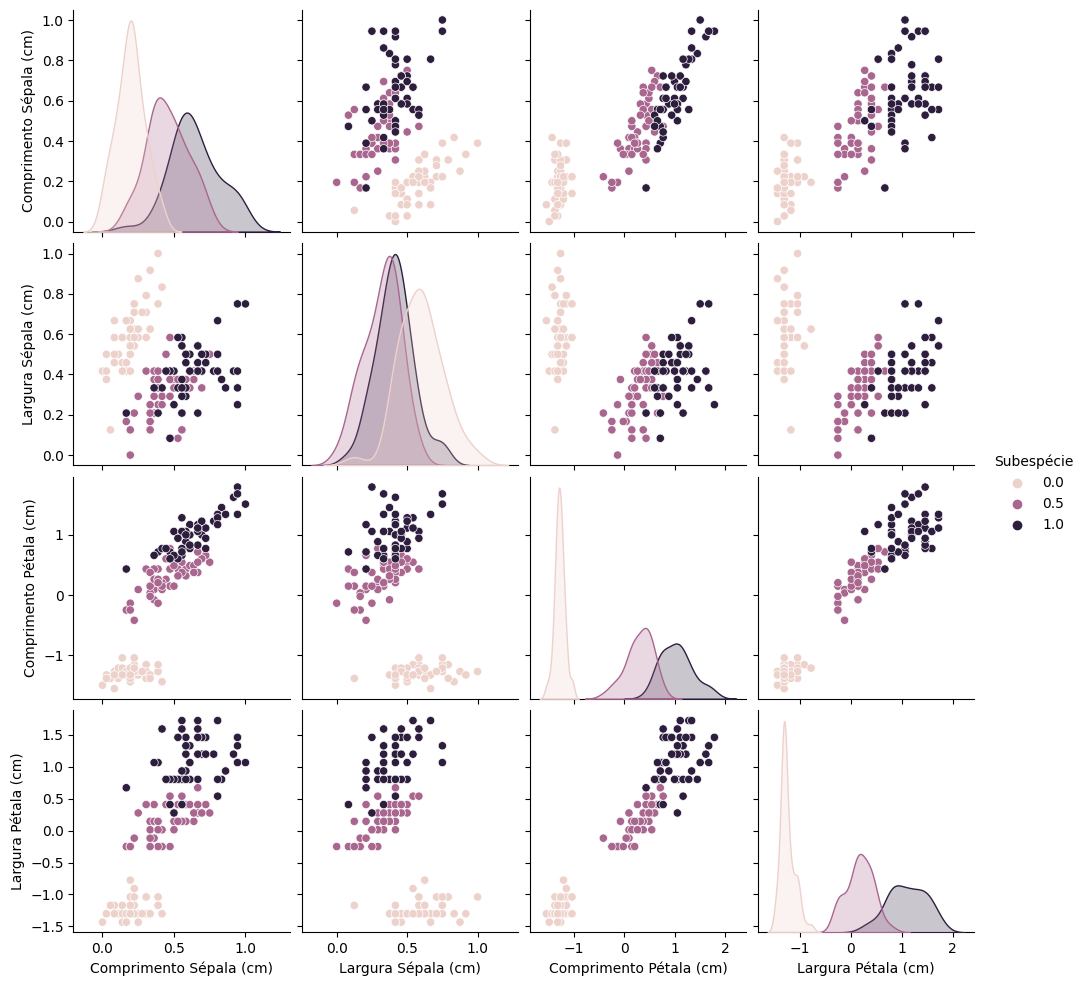

In [17]:
sb.pairplot(data, hue="Subespécie");

Por esse gráfico, vemos que as classes 0.5 (originalmente a classe 1) e 1 (originalmente a classe 2) são mais similares entre si, em termos de características e distribuições delas. A flor de subespécie classe 0.5 apresenta no geral características maiores que as da flor da subespécie 1. Ambas ainda são maiores que a flor de subespécie 0 (originalmente a classe 0), a qual apresenta os menores valores de suas características para a maioria das variáveis. Além disso, os elementos dessa subespécie apresentam uma distribuição com menor curtose e características mesocorticais, ao passo que as classes 0.5 e 1 são mais leptocúrticas na maioria das variáveis.

Após essa análise, procedemos com a retirada de outliers a partir da técnica de z-score e interquartil para comparação.

In [18]:
# Padronizando os dados usando z-score para remocao de outlier 
#i.e. deixamos a média 0 e o desvio padrão igual a 1 em toda a base
#Agrupamento feito por subespecie para nao distorcer os atributos
dfz_outlier = pd.merge( data,  data.groupby('Subespécie').mean(), on = 'Subespécie', suffixes=('', '_mean'))
dfz_outlier = pd.merge( dfz_outlier,  data.groupby('Subespécie').std(), on = 'Subespécie', suffixes=('', '_std'))
dfz_outlier['Comprimento Sépala (cm)'] = ( dfz_outlier['Comprimento Sépala (cm)']- dfz_outlier['Comprimento Sépala (cm)_mean']) /  dfz_outlier['Comprimento Sépala (cm)_std']
dfz_outlier['Largura Sépala (cm)'] = ( dfz_outlier['Largura Sépala (cm)']- dfz_outlier['Largura Sépala (cm)_mean']) /  dfz_outlier['Largura Sépala (cm)_std']
dfz_outlier['Comprimento Pétala (cm)'] = ( dfz_outlier['Comprimento Pétala (cm)']- dfz_outlier['Comprimento Pétala (cm)_mean']) /  dfz_outlier['Comprimento Pétala (cm)_std']
dfz_outlier['Largura Pétala (cm)'] = ( dfz_outlier['Largura Pétala (cm)']- dfz_outlier['Largura Pétala (cm)_mean']) /  dfz_outlier['Largura Pétala (cm)_std']
dfz_outlier =  dfz_outlier.iloc[:,:5]
dfz_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 147
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Comprimento Sépala (cm)  148 non-null    float64
 1   Largura Sépala (cm)      148 non-null    float64
 2   Comprimento Pétala (cm)  148 non-null    float64
 3   Largura Pétala (cm)      148 non-null    float64
 4   Subespécie               148 non-null    float64
dtypes: float64(5)
memory usage: 6.9 KB


In [19]:
#Removendo outliers (todas as amostras a mais de 3 desvios padrões da média)
idxLimSup = dfz_outlier[dfz_outlier.drop('Subespécie',axis=1).gt(3).any(axis=1)].index #ìndices onde qualquer coluna é maior que 3, exceto Subespécie
idxLimInf = dfz_outlier[dfz_outlier.drop('Subespécie',axis=1).lt(-3).any(axis=1)].index #ìndices onde qualquer coluna é menor que 3, exceto Subespécie
df_clean = data.drop(idxLimSup, axis=0) #removendo amostras acima do limite
df_clean.drop(idxLimInf, axis=0, inplace=True) #removendo amostras abaixo do limite

print('Dados limpos com limite superior: '+ str(len(idxLimSup)))
print('Dados limpos com limite inferior: '+ str(len(idxLimInf)) +'\n')
df_clean.info()

Dados limpos com limite superior: 1
Dados limpos com limite inferior: 0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 147
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Comprimento Sépala (cm)  147 non-null    float64
 1   Largura Sépala (cm)      147 non-null    float64
 2   Comprimento Pétala (cm)  147 non-null    float64
 3   Largura Pétala (cm)      147 non-null    float64
 4   Subespécie               147 non-null    float64
dtypes: float64(5)
memory usage: 6.9 KB


Remoção de 1 outlier das amostras a mais de 3 desvios padrões da média

In [20]:
"""
  Conclusoes:
    1) Remoção dos outliers indicados no boxplot para cada especie pelo interquartil
    2) Redução de 147 para 137 = 7% da base de dados
"""

### Remocao dos outliers verificados no boxplot utilizando os indices antes e
### depois dos limites dos boxplot da figura anteior
dados_outlayerless = df_clean.copy()

### outlier no Comprimento Sépala (cm) da especie 1
q1 = dados_outlayerless[(dados_outlayerless['Subespécie'] == 1)]['Comprimento Sépala (cm)'].quantile(0.25)
q3 = dados_outlayerless[(dados_outlayerless['Subespécie'] == 1)]['Comprimento Sépala (cm)'].quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
outliers = dados_outlayerless[(dados_outlayerless['Subespécie'] == 1)] \
                              [(dados_outlayerless[(dados_outlayerless['Subespécie'] == 1)]['Comprimento Sépala (cm)'] < limite_inferior)]
dados_outlayerless.drop(outliers.index, axis=0, inplace=True)
print('Quantidade de dados de Comprimento Sépala (cm) da especie 1 excluidos: '+str(len(outliers.index)))

### outlier na Largura Sépala (cm) da especie 0
q1 = dados_outlayerless[(dados_outlayerless['Subespécie'] == 0)]['Largura Sépala (cm)'].quantile(0.25)
q3 = dados_outlayerless[(dados_outlayerless['Subespécie'] == 0)]['Largura Sépala (cm)'].quantile(0.75)
iqr = q3 - q1
limite_superior = q3 + 1.5 * iqr
limite_inferior = q1 - 1.5 * iqr
outliers = dados_outlayerless[(dados_outlayerless['Subespécie'] == 0)] \
                      [(dados_outlayerless[(dados_outlayerless['Subespécie'] == 0)]['Largura Sépala (cm)'] > limite_superior) | \
                       (dados_outlayerless[(dados_outlayerless['Subespécie'] == 0)]['Largura Sépala (cm)'] < limite_inferior)]
dados_outlayerless.drop(outliers.index, axis=0, inplace=True)
print('Quantidade de dados de Largura Sépala (cm) da especie 0 excluidos: '+str(len(outliers.index)))

### outlier no Comprimento Pétala (cm) da especie 0
q1 = dados_outlayerless[(dados_outlayerless['Subespécie'] == 0)]['Comprimento Pétala (cm)'].quantile(0.25)
q3 = dados_outlayerless[(dados_outlayerless['Subespécie'] == 0)]['Comprimento Pétala (cm)'].quantile(0.75)
iqr = q3 - q1
limite_superior = q3 + 1.5 * iqr
limite_inferior = q1 - 1.5 * iqr
outliers = dados_outlayerless[(dados_outlayerless['Subespécie'] == 0)] \
                      [(dados_outlayerless[(dados_outlayerless['Subespécie'] == 0)]['Comprimento Pétala (cm)'] > limite_superior) | \
                       (dados_outlayerless[(dados_outlayerless['Subespécie'] == 0)]['Comprimento Pétala (cm)'] < limite_inferior)]
dados_outlayerless.drop(outliers.index, axis=0, inplace=True)
print('Quantidade de dados de Comprimento Pétala (cm) da especie 0 excluidos: '+str(len(outliers.index)))

### outlier no Comprimento Pétala (cm) da especie 0.5
q1 = dados_outlayerless[(dados_outlayerless['Subespécie'] == 0.5)]['Comprimento Pétala (cm)'].quantile(0.25)
q3 = dados_outlayerless[(dados_outlayerless['Subespécie'] == 0.5)]['Comprimento Pétala (cm)'].quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
outliers = dados_outlayerless[(dados_outlayerless['Subespécie'] == 0.5)] \
                      [(dados_outlayerless[(dados_outlayerless['Subespécie'] == 0.5)]['Comprimento Pétala (cm)'] < limite_inferior)]
dados_outlayerless.drop(outliers.index, axis=0, inplace=True)
print('Quantidade de dados de Comprimento Pétala (cm) da especie 0.5 excluidos: '+str(len(outliers.index)))

### outlier na Largura Pétala (cm) da especie 0
q1 = dados_outlayerless[(dados_outlayerless['Subespécie'] == 0)]['Largura Pétala (cm)'].quantile(0.25)
q3 = dados_outlayerless[(dados_outlayerless['Subespécie'] == 0)]['Largura Pétala (cm)'].quantile(0.75)
iqr = q3 - q1
limite_superior = q3 + 1.5 * iqr
outliers = dados_outlayerless[(dados_outlayerless['Subespécie'] == 0)] \
                      [(dados_outlayerless[(dados_outlayerless['Subespécie'] == 0)]['Largura Pétala (cm)'] > limite_superior)]
dados_outlayerless.drop(outliers.index, axis=0, inplace=True)
print('Quantidade de dados de  Largura Pétala (cm) da especie 0 excluidos: '+str(len(outliers.index)))

dados_clean = dados_outlayerless.copy()
dados_clean

Quantidade de dados de Comprimento Sépala (cm) da especie 1 excluidos: 1
Quantidade de dados de Largura Sépala (cm) da especie 0 excluidos: 1
Quantidade de dados de Comprimento Pétala (cm) da especie 0 excluidos: 6
Quantidade de dados de Comprimento Pétala (cm) da especie 0.5 excluidos: 1
Quantidade de dados de  Largura Pétala (cm) da especie 0 excluidos: 1


,Comprimento Sépala (cm),Largura Sépala (cm),Comprimento Pétala (cm),Largura Pétala (cm),Subespécie
0,0.222222,0.625000,-1.326247,-1.301769,0.0
1,0.166667,0.416667,-1.326247,-1.301769,0.0
2,0.111111,0.500000,-1.382927,-1.301769,0.0
3,0.083333,0.458333,-1.269566,-1.301769,0.0
4,0.194444,0.666667,-1.326247,-1.301769,0.0
...,...,...,...,...,...
143,0.666667,0.416667,0.827612,1.459936,1.0
144,0.555556,0.208333,0.714251,0.933897,1.0
145,0.611111,0.416667,0.827612,1.065407,1.0
146,0.527778,0.583333,0.940973,1.459936,1.0


Após remoção dos outliers pelos dados distantes 3* desvio padrão (1 outlier) e pelos dados apresentados no boxplox (10 outliers), geramos novamente o boxplot das espécies para verificar se os limites mudaram.

Text(0, 0.5, 'cm')

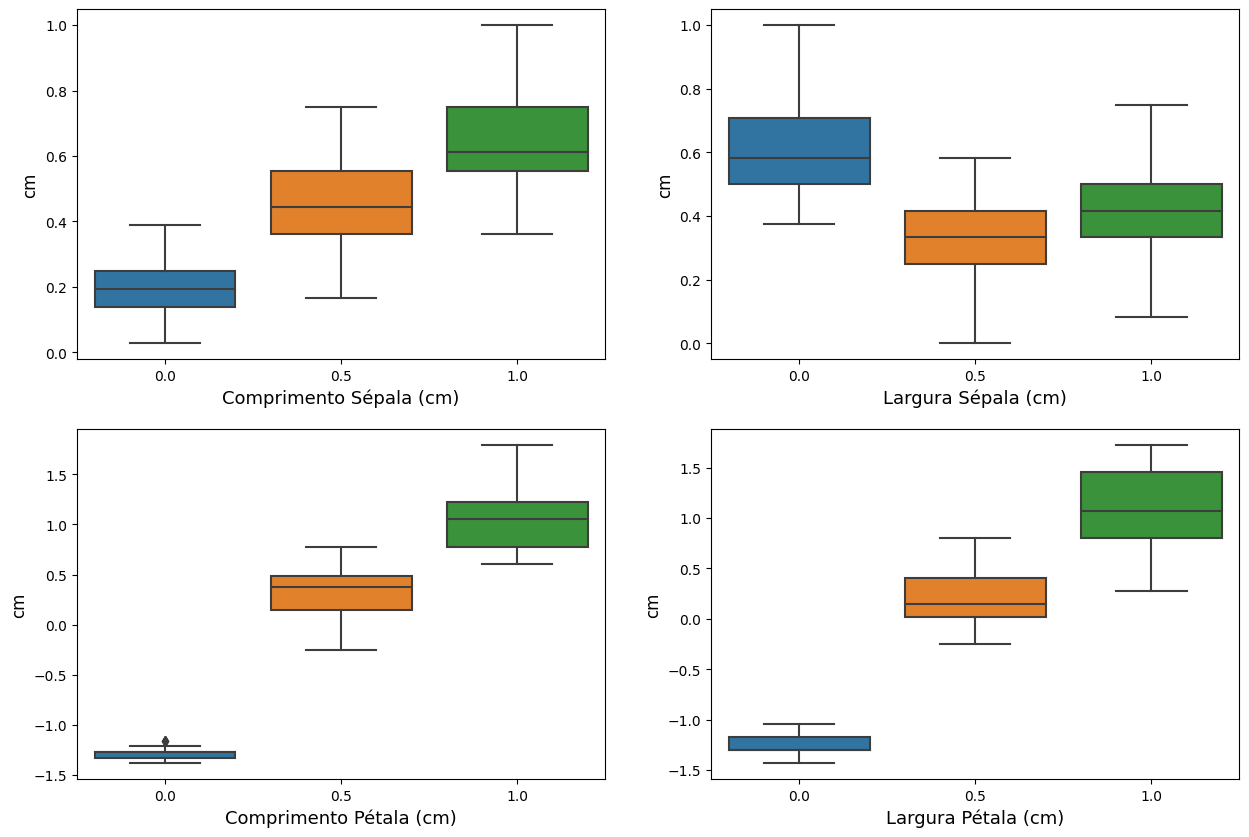

In [21]:
# Boxplot agrupando por subespecie pois entendemos que as especies
# possuem diferentes faixas de atributos

fig, ax = plt.subplots(2, 2, figsize=(15,10))
colunas = ['Comprimento Sépala (cm)', 'Largura Sépala (cm)', 'Comprimento Pétala (cm)', 'Largura Pétala (cm)']

sb.boxplot(data=dados_clean, y='Comprimento Sépala (cm)', x='Subespécie', ax=ax[0,0])
ax[0][0].set_xlabel(colunas[0], fontsize=13)
ax[0][0].set_ylabel('cm', fontsize=12)

sb.boxplot(data=dados_clean, y='Largura Sépala (cm)', x='Subespécie',ax=ax[0,1])
ax[0][1].set_xlabel(colunas[1], fontsize=13)
ax[0][1].set_ylabel('cm', fontsize=12)

sb.boxplot(data=dados_clean, y='Comprimento Pétala (cm)', x='Subespécie',ax=ax[1,0])
ax[1][0].set_xlabel(colunas[2], fontsize=13)
ax[1][0].set_ylabel('cm', fontsize=12)

sb.boxplot(data=dados_clean, y='Largura Pétala (cm)', x='Subespécie',ax=ax[1,1])
ax[1][1].set_xlabel(colunas[3], fontsize=13)
ax[1][1].set_ylabel('cm', fontsize=12)

Dados foram alterados. Surgiu um novo outlier mas não é um problema se comparado aos primeiros gráficos já que após a remoção os dados estatísticos foram alterados

Seguimos então para a normalização dos dados

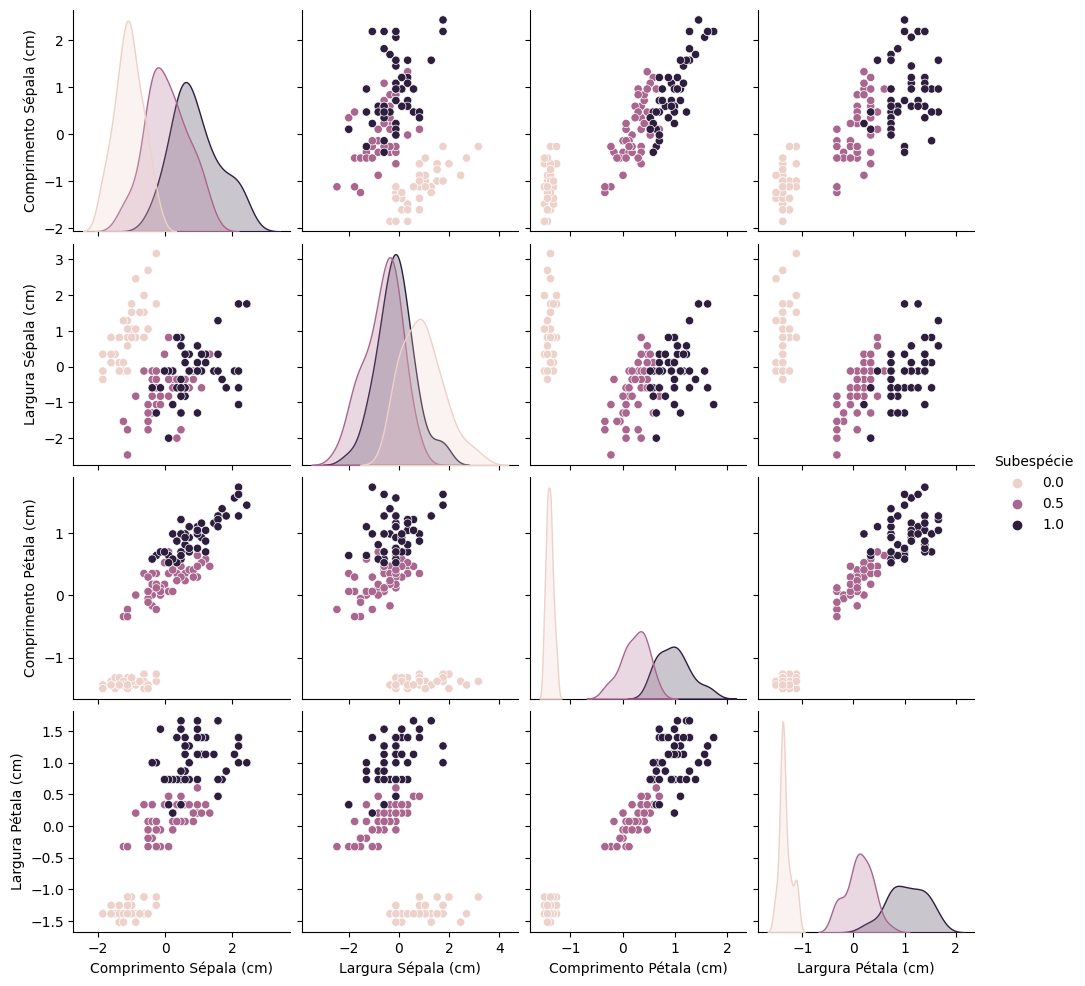

In [22]:
# Normalizando o dataset limpo pelo z-score e interquartil
# Neste caso agrupa todas especies para ter a diferenciacao entre elas
dfz = (dados_clean.iloc[:,:-1] - dados_clean.iloc[:,:-1].mean()) / dados_clean.iloc[:,:-1].std()
dfz['Subespécie'] = dados_clean['Subespécie'] 
sb.pairplot(dfz, hue="Subespécie")

In [23]:
dfz['Subespécie'].value_counts()

0.5    49
1.0    47
0.0    41
Name: Subespécie, dtype: int64

Após a remoção dos outliers, tivemos um desbalanceamento das classes. Rebalanceando dados por oversampling.

In [24]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
dfz['Subespécie'] = dfz['Subespécie'].astype('string')

X_smote, y_smote = smote.fit_resample(dfz.drop(columns=['Subespécie']), dfz['Subespécie'])
dfz = pd.concat([X_smote, y_smote],axis=1)
dfz['Subespécie'] = dfz['Subespécie'].astype('float64')
dfz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Comprimento Sépala (cm)  147 non-null    float64
 1   Largura Sépala (cm)      147 non-null    float64
 2   Comprimento Pétala (cm)  147 non-null    float64
 3   Largura Pétala (cm)      147 non-null    float64
 4   Subespécie               147 non-null    float64
dtypes: float64(5)
memory usage: 5.9 KB


In [25]:
dfz['Subespécie'].value_counts()

0.0    49
0.5    49
1.0    49
Name: Subespécie, dtype: int64

Redução no número de dados de 150 para 147.
Redução de 2% no número de amostras.

Vale notar que por padronização: 
* A classe 0 corresponde ao valor de aproximadamente 0
* A 1 corresponde ao valor de aproximadamente 0,5
* A classe 2 corresponde ao valor de aproximadamente 1


# 🔢 PCA - Visualização

A aplicação do PCA para a visualização permite que um conjunto de dados com ao menos mais de 3 dimensões, possa ser visualizado no gráfico 2d ou 3d. Para isso, essa técnica faz a projeção em domínios menores. Considerando que nosso conjunto possui 4 variáveis preditoras e 1 predita, ao todo existem 5 dimensões. Verificamos primeiramente a correlação entre essas variáveis antes de aplicarmos o PCA.

<Axes: >

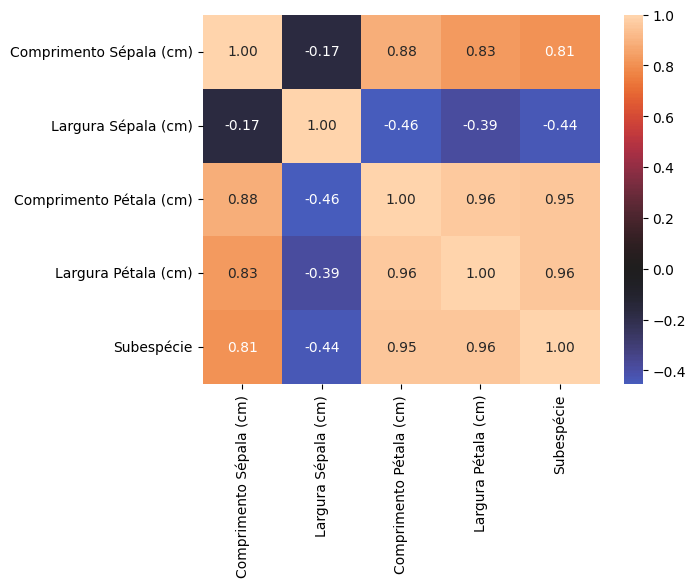

In [26]:
sb.heatmap(dfz.corr(), fmt=".2f", annot=True, center=0.0)

Dentre essas variáveis, a Largura e comprimento da Sépala são as que estão fracamente correlacionadas. Isso é uma característica interessante pois ambas variáveis se referem a sépala das subespécies. As demais possuem correlação mais próxima à média ou forte. As subespécies estão mais correlacionadas a características de pétala do que de sépala. Provavelmente ao aplicarmos o PCA teremos um resultado que reflita características principais e que distinguem as classes. A seguir temos a aplicação dessa técnica.

In [27]:
#importaçao das bibliotecas para o PCA
import plotly.express as px
from sklearn.decomposition import PCA

In [28]:
# colocando o maximo de variaveis possiveis 2D
d = 4
pca = PCA(n_components=d)
components = pca.fit_transform(dfz.iloc[:,:-1])
total_var = pca.explained_variance_ratio_.sum() * 100
print(f'Variância Total Explicada: {total_var:.2f}%')
px.scatter(components)

Variância Total Explicada: 100.00%


In [29]:
# colocando o maximo de variaveis possiveis 
d = 4
pca = PCA(n_components=d)
components = pca.fit_transform(dfz.iloc[:,:-1])

total_var = pca.explained_variance_ratio_.sum() * 100
fig = px.scatter_3d(
            components, x=0, y=1, z=2,
            title=f'Variância Total Explicada: {total_var:.2f}%',
            labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
            color=dfz.iloc[:,-1],
            )
fig.show()

Como podemos observar e é de se esperar o PCA com todas as variáveis conseguem definir 100% das nossas amostras. A cor amarela representa a classe com valor de aproximadamente 1 que corresponde a classe original 2. A cor rosa possui aproximadamente valor 0 e corresponde a classe 0. A classe 0,5 azul a que restou.


Quanto à disposição geral da amostra, observa-se que a subespécie representada pela cor azul é a que está mais distante das demais. No gráfico as de cor amarela e rosa apresentam instâncias bem misturadas visivelmente entre essas classes, as quais seriam originalmente a 0 e 2.


Essa observação foi interessante pois nas etapas anteriores de análises dos dados, a classe 1 apresentou valores mais similares aos da classe 2, ao contrário do que vemos nesse visual.


Apesar da variância explicada ser de 100% ao considerar o PCA apenas para a visualização, vê-se que não é trivial identificar diferenças entre os grupos de duas classes, 0 e 2, e ainda assim visualizar a semelhança da 1 com a 2 por esse gráfico.


No plot 2D dá pra visualizar melhor essa mistura e separação existente entre as classes.


Portanto, pelo gráfico de correlação dos atributos temos as seguintes conclusões: A variável mais correlacionada com a Subespécie é a Largura Pétala. Em seguida é o Comprimento Pétala. Contudo, esta está fortemente correlacionada com a Largura da Pétala, então a descartamos. Em seguida está o Comprimento Sépala. Esta variável apresenta uma correlação maior com as demais do que a Largura Sépala que foi a variável restante. Por isso entendemos que com 2 variáveis é possível termos uma boa caracterização dos dados, sendo Largura Pétala e Largura Sépala os atributos e portanto adotaremos o PCA com 2 componentes para redução de dimensionalidade.




Importância das variaveis:
1    74.321393
2    21.750446
dtype: float64

Variância Total Explicada: 96.07%


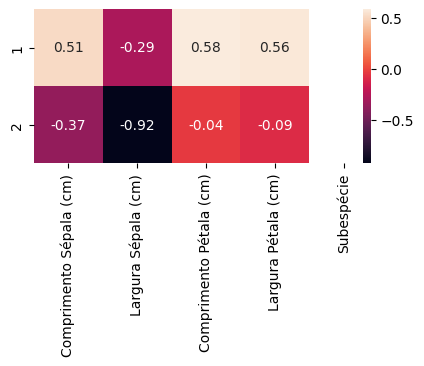

In [30]:
d = 2
pca = PCA(n_components=d)
pca = pca.fit(dfz.iloc[:,:-1])

plt.figure(figsize=(5, 2))
sb.heatmap(pca.components_, fmt='.2f', annot=True, xticklabels=df.columns, yticklabels=range(1,d+1))

#pca.explained_variance_ratio_ guarda o quanto cada componente explica da variância total
print("Importância das variaveis:")
print(pd.Series(pca.explained_variance_ratio_*100, index=range(1,d+1)))
total_var = pca.explained_variance_ratio_.sum() * 100
print(f'\nVariância Total Explicada: {total_var:.2f}%')

Com duas componentes do PCA conseguimos representar 98,4% dos dados. A variável 1 possui uma correlação fraca e negativa com a Largura Sépala. No entanto, a variável 2 possui uma correlação mais forte com essa variável. Nota-se que as 2 juntas conseguem descrever as 4 variáveis com correlações médias e fortes e positivas em pelo menos uma delas.

In [31]:
# 2 componentes
dados_pca = pca.fit_transform(dfz.iloc[:,:-1])
total_var = pca.explained_variance_ratio_.sum() * 100
print(f'Variância Total Explicada: {total_var:.2f}%')
px.scatter(pd.DataFrame(dados_pca, columns=['PCA 1', 'PCA 2']),
           color=dfz.iloc[:,-1],
           title='Separação das Subspécies por PCA')

Variância Total Explicada: 96.07%


No entanto, as componentes principais do PCA possuem uma interpretabilidade baixa, então vamos demonstrar nos atributos com maior grau de influência nas componentes.

Importância das variaveis:
1    74.321393
2    21.750446
dtype: float64

Variância Total Explicada: 96.07%


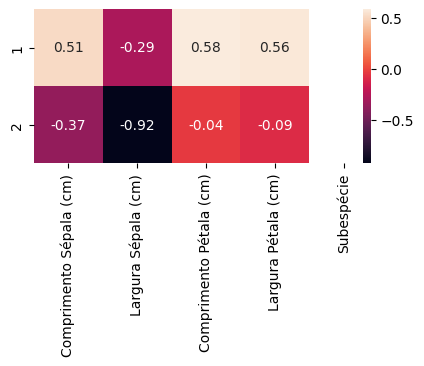

In [32]:
plt.figure(figsize=(5, 2))
sb.heatmap(pca.components_, fmt='.2f', annot=True, xticklabels=df.columns, yticklabels=range(1,d+1))

print("Importância das variaveis:")
print(pd.Series(pca.explained_variance_ratio_*100, index=range(1,d+1)))
print(f'\nVariância Total Explicada: {total_var:.2f}%')

Para passar o conhecimento ao especialista levaremos em consideração os dados acima. Considerando um percentual de representação dos dados de 96,1%, temos na primeira componente que o Comprimento de Pétala e Largura de Pétala como sendo os atributos que melhor discriminam os dados. No entanto, a correlação entre eles é muito alta e podemos selecionar somente 1 deles.<br>
A segunda componente é bastante influenciada pelo comprimento e largura de pétala que já foram selecionadas, mas a Largura da Sépala é um atributo bastante influente.<br>
Portanto, para o nosso gráfico representativo de separação dos dados utilizaremos os atributos **Largura de Pétala e Largura de Sépala**.

In [33]:
dfz2 = dfz[['Largura Pétala (cm)','Largura Sépala (cm)','Subespécie']]

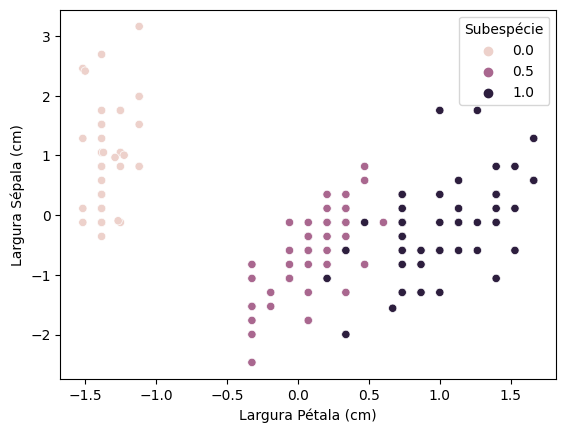

In [34]:
# Plotando o scatterplot
ax = sb.scatterplot(dfz2, 
                    x='Largura Pétala (cm)', 
                    y='Largura Sépala (cm)',
                    hue='Subespécie')

# Exibindo o gráfico
plt.show()

Com esses dados tivemos uma boa redução de dimensionalidade e separação das classes de Subespécie para o especialista

# 🔢 PCA - Seleção de Atributos

Procedendo com a etapa de seleção de atributos, escolhemos um dos métodos utilizados para a seleção a fim de verificarmos quais devemos selecionar. Como procuramos manter a explicabilidade dos atributos e minimizar a perda de informação, analisamos as correlações entre elas a fim de não selecionar as que estão mais correlacionadas e obter ao final características menos redundantes.

<Axes: >

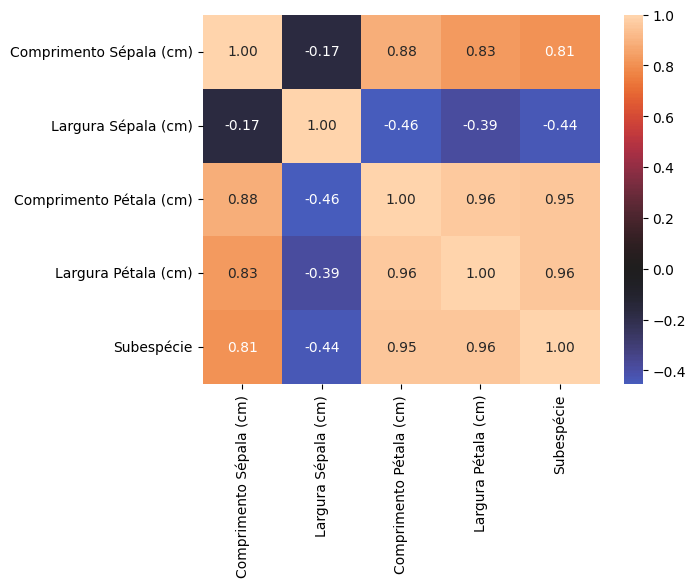

In [35]:
sb.heatmap(dfz.corr(), fmt=".2f", annot=True, center=0.0)

Com base na tabela de correlação identifica-se que os atributos Comprimento de Pétala e Largura de Pétala possuem alta correlação com a variável target, no entanto, a correlação entre elas também é alta, então vamos selecionar somente 1 delas.
Comprimento de Sépala é o próximo atributo com maior correlação com o target, mas também há grande correlação com os dois atributos anteriores, assim, mesmo a Largura de Sépala não tendo alta correlação com o target, utilizaremos ela por ser independente dos demais atributos e auxiliará o atributo principal a definir a separação das subespécies.
Portanto, escolhemos **Largura de Pétala e Largura de Sépala**.

In [36]:
dfz_select = dfz[['Largura Pétala (cm)','Largura Sépala (cm)','Subespécie']]

Dessa forma projetamos diretamente os dados das amostras que estavam em quatro dimensões de atributos em duas.
Avaliamos a facilidade de separação dos dados visualmente no gráfico abaixo.


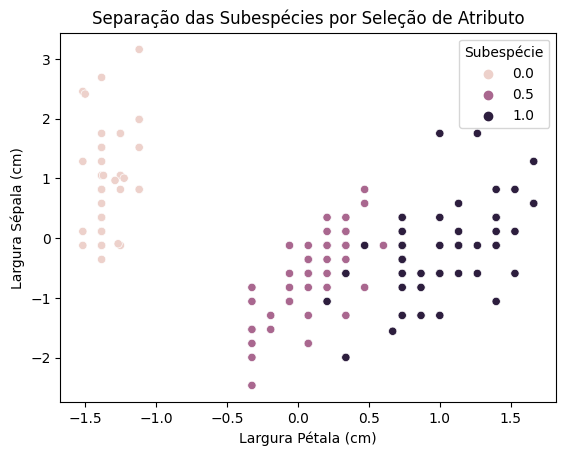

In [37]:
# Plotando o scatterplot
ax = sb.scatterplot(dfz_select, 
                    x='Largura Pétala (cm)', 
                    y='Largura Sépala (cm)',
                    hue='Subespécie')
plt.title('Separação das Subespécies por Seleção de Atributo')

# Exibindo o gráfico
plt.show()

Portanto, acima conseguimos identificar os atributos que melhor separam as amostras devido às classes do atributo target

# 🔎 Análise das diferenças das abordagens

Durante o processo de redução de dimensionalidade tratamos os dados e detectamos as seguintes informações:

- Necessidade de normalização dos dados
- Outliers detectados nas 3 espécies
- Espécie 1 e 2 são mais similares entre si
- Balanceamento dos dados com base no atributo target após exclusão de outliers com base no método de overfitting preenchendo as classes com menor quantidade de amostras.
- Na aplicação do PCA definimos que duas dimensões foram o suficiente para a redução dos dados com um alto grau de representação.
- Na seleção de atributos verificamos que a maior influência era de 2 atributos e avaliamos visualmente com gráficos


Para a análise da diferença entre a abordagem do PCA e da seleção de atributos construiremos a árvore de decisão de ambas informações aplicando sobre os dados.

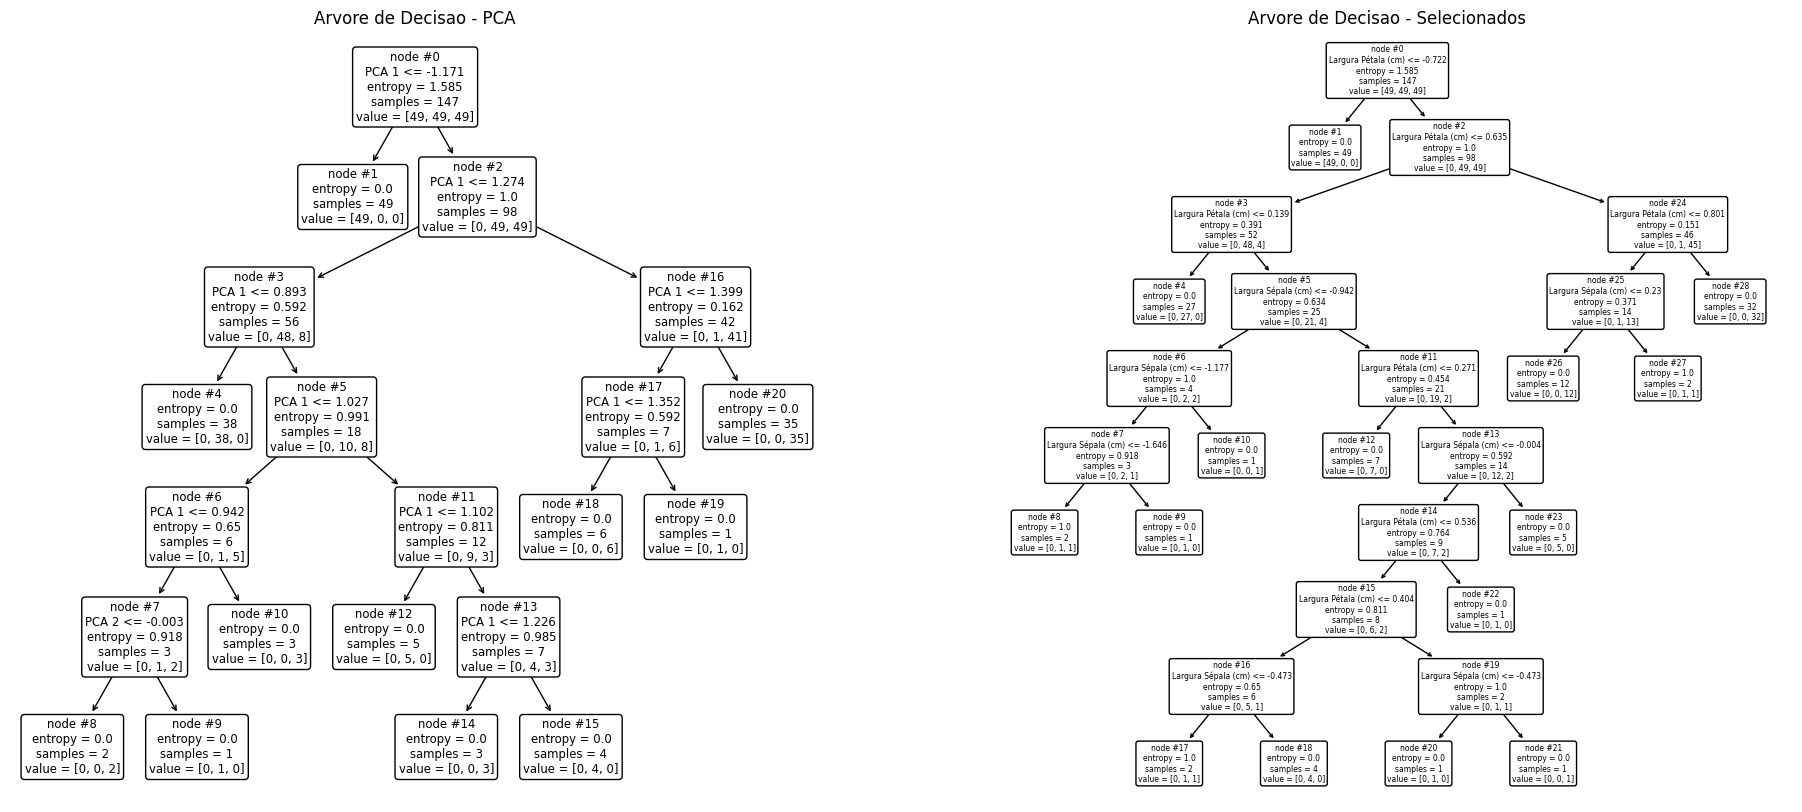

In [38]:
from sklearn import tree # estrutura de árvore
from sklearn.tree import DecisionTreeClassifier

# criando o classificador
clf = DecisionTreeClassifier(criterion="entropy") 
clf2 = DecisionTreeClassifier(criterion="entropy") 

# separando atributos do rótulo "espécie"
df_atributos = pd.DataFrame(dados_pca, columns=['PCA 1', 'PCA 2'])
dfz['Subespécie'] = dfz['Subespécie'].astype('string')
df_rotulos = dfz['Subespécie']

df_atributos2 = dfz_select.drop('Subespécie', axis=1, inplace=False)

clf.fit(df_atributos, df_rotulos)
clf2.fit(df_atributos2, df_rotulos)

# imprimindo as regras geradas
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(23,10))
tree.plot_tree(clf, feature_names=df_atributos.columns, ax=ax[0],
               filled=False, node_ids=True, rounded=True)
tree.plot_tree(clf2, feature_names=df_atributos2.columns, ax=ax[1],
               filled=False, node_ids=True, rounded=True)
ax[0].set_title('Arvore de Decisao - PCA')
ax[1].set_title('Arvore de Decisao - Selecionados')
print("")

**Questão 1:** A árvore de decisão da Iris com apenas 2 atributos selecionados seria mais fácil de interpretar? Vale a perda de informação por usar menos atributos?

Para essa questão, constatamos os seguintes pontos:


A) Selecionando 2 atributos a árvore de decisão explicaria melhor as regras que foram tomadas para a classificação, mas seus resultados  se restringem ao diagrama de árvore.


B) O PCA trás um modo visual para separar as classes em gráficos e entender como se dá a dispersão espacial dos dados. No estudo, 2 classes ficaram próximas entre si e 1 distante das demais, o que foi facilmente visualizado pelo gráfico do PCA.


C) Ambas técnicas PCA e árvore de decisão permitem visualizar a importância dos atributos. Na árvore os mais importantes estão concentrados no nó raiz, pois são essenciais para as tomadas de decisões. Nela também é possível saber os limiares adotados nas regras. Já no PCA é possível saber quem são os mais importantes mas nem sempre é possível interpretar esse atributo.


D) Uso de 2 atributos mais importantes explicou um percentual alto de amostras e permitiu entender melhor o cenário e a plotagem dos dados. Por isso, a perda de informação por menos atributos pode ser válida, sobretudo porque ao se ter os principais atributos, essa perda é minimizada, compensando essa decisão.


**Questão 2:** Nesse trabalho, na parte de visualização, podem ser usadas 2 ou 3 dimensões (componentes principais), como escolher a quantidade de dimensões para o gráfico?

Para essa questão, constatamos os seguintes pontos:


A) os dados tem 4 variáveis e a escolha se deu pela quantidade de variáveis que queríamos utilizar e pelo percentual de amostras abordadas
B) um gráfico 3D abrange um percentual maior que o 2D por utilizar mais variáveis
C) Para fazer um gráfico 3D tem que haver mais de 2 variáveis
D) Os fatores de maior percentual e haver mais de 2 variáveis foi o que nos fez escolher pela dimensão 2.